**Team 1**: Indira Aitkulova, Antonio Azevedo, Alex Chae, Ashley Nguyen

---



**Dataset**: Traffic Crash

# Updates on Milestone 1 - Data Cleaning

## Variables & Hypothesis

**Independent Variable**: Driver's sex

**Dependent Variable**: Level of injury in the crashes (number of injured people / total people in a crash)

**Hypothesis**: There is a difference in injury rate in crashes with female drivers compared to drivers of other genders. 

Because there are several control variables in the dataset, we will section these control variables into 3 groups: external factors, vehicle-related, and people-related. Next we will go through several exploratory analysis to decide which control variables to include in our model.

## Focusing on Inference

The Traffic Dataset we're provided with has over 100 different columns combined, and running correlation blindly on combinations of these possible columns would be a herculean task. Fortunately, some of these columns have either no clear correlation with the level of injury (e.g. whether the Chicago Police dept took photos of the incident), or their information has already been encapsulated by other variables (e.g. crash location influence can be retrieved by latitude and longitude, so information about the street numbers and names may be redundant). We look at the union of all possible columns to filter out obvious ones:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# input_path =  '/content/drive/My Drive/Junior Spring/Applied Data Science/Project/Traffic Crash/' #Alex
# input_path =  '/content/drive/MyDrive/Applied Data Science/Project/Traffic Crash/' #Antonio
# input_path="/content/drive/My Drive/Colab Notebooks/Applied Data Science/Project/Traffic Crash/"#Indira
input_path = '/content/drive/MyDrive/EY 2022-2023 Junior/Spring 2023/SOCSC-UH 2214 Applied Data Science/project/Traffic Crash/' #Ashley

In [4]:
crashes = pd.read_csv(input_path + 'Traffic_Crashes_-_Crashes.csv', low_memory=False)
vehicles = pd.read_csv(input_path + 'Traffic_Crashes_-_Vehicles.csv', low_memory=False)
people = pd.read_csv(input_path + 'Traffic_Crashes_-_People.csv', low_memory=False)

In [5]:
crashes_cols = list(crashes.columns)
people_cols = list(people.columns)
vehicles_cols = list(vehicles.columns)

# Get unique columns across all 3 datasets
available_cols = crashes_cols + list(set(people_cols + vehicles_cols) - set(crashes_cols))
print(available_cols)

['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'HAZMAT_NAME', 'AREA_99_I', 'TOWED_BY', 'DRIVER_VISION', 'AREA_01_I', 

In [6]:
# Keep only the columns related to the problem statement

crashes = crashes.loc[:, ['CRASH_RECORD_ID', 'CRASH_DATE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_TYPE', 'DAMAGE', 'INJURIES_TOTAL','INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN','LONGITUDE','LATITUDE']]
people = people.loc[:, ['PERSON_ID','PERSON_TYPE', 'CRASH_RECORD_ID', 'SEX', 'AGE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'INJURY_CLASSIFICATION', 'CITY', 'STATE']]
vehicles = vehicles.loc[:, ['VEHICLE_ID', 'CRASH_RECORD_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_TYPE', 'UNIT_TYPE', 'EXCEED_SPEED_LIMIT_I', 'VEHICLE_DEFECT']]
#['CRASH_RECORD_ID', 'UNIT_TYPE', 'VEHICLE_ID', 'EXCEED_SPEED_LIMIT_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE']]

In [7]:
# Merging 3 dataframes by the CRASH_RECORD_ID column
merged_df = pd.merge(pd.merge(crashes, people, on='CRASH_RECORD_ID', how='outer'), vehicles, on='CRASH_RECORD_ID', how='outer')

In [8]:
# Remove duplicated rows
merged_df = merged_df[~merged_df.duplicated()]

# Necessary type converstion to datetime 
merged_df["CRASH_DATE"]=pd.to_datetime(merged_df["CRASH_DATE"], errors= 'ignore')
merged_df["VEHICLE_YEAR"]=pd.to_datetime(merged_df["VEHICLE_YEAR"], errors= 'ignore')

# Change meaningless string values to None type
merged_df.loc[merged_df["DEVICE_CONDITION"] == "UNKNOWN", "DEVICE_CONDITION"] = None
merged_df.loc[merged_df["WEATHER_CONDITION"] == "UNKNOWN", "WEATHER_CONDITION"] = None
merged_df.loc[merged_df["LIGHTING_CONDITION"] == "UNKNOWN", "LIGHTING_CONDITION"] = None
merged_df.loc[merged_df["SAFETY_EQUIPMENT"] == "USAGE UNKNOWN", "SAFETY_EQUIPMENT"] = None
merged_df.loc[merged_df["AIRBAG_DEPLOYED"] == "DEPLOYMENT UNKNOWN", "AIRBAG_DEPLOYED"] = None
merged_df.loc[merged_df["AIRBAG_DEPLOYED"] == "NOT APPLICABLE", "AIRBAG_DEPLOYED"] = None
merged_df.loc[merged_df["MAKE"] == "UNKNOWN", "MAKE"] = None
merged_df.loc[merged_df["MODEL"] == "UNKNOWN", "MODEL"] = None
merged_df.loc[merged_df["MODEL"] == "OTHER (EXPLAIN IN NARRATIVE)", "MODEL"] = None

# Make MAKE_MODEL column 
merged_df['MAKE_MODEL'] = merged_df['MAKE'] + " " + merged_df['MODEL']

# Remove ages below 0, remove drivers that have low ages
merged_df.loc[merged_df["AGE"] < 0, "AGE"] = None
merged_df = merged_df[((merged_df['AGE'] >= 16) & (merged_df['PERSON_TYPE'] == 'DRIVER')) | (merged_df['PERSON_TYPE'] != 'DRIVER')]

# Remove rows with no injury data
merged_df = merged_df[(merged_df["INJURIES_TOTAL"].isna()== False)|(merged_df["INJURIES_FATAL"].isna()==False)|(merged_df["INJURIES_INCAPACITATING"].isna()==False)|(merged_df["INJURIES_NON_INCAPACITATING"].isna()==False)|(merged_df["INJURIES_REPORTED_NOT_EVIDENT"].isna()==False)|(merged_df["INJURIES_NO_INDICATION"].isna()==False)|(merged_df["INJURIES_UNKNOWN"].isna()==False)]

# Convert column names to lower case
merged_df.columns = [x.lower().strip() for x in list(merged_df.columns)]

In [9]:
merged_df.head(2)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,state,vehicle_id,make,model,vehicle_year,vehicle_type,unit_type,exceed_speed_limit_i,vehicle_defect,make_model
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,NaN,582401.0,CHEVROLET,CRUZE,1970-01-01 00:00:00.000002017,PASSENGER,DRIVER,NaN,NONE,CHEVROLET CRUZE
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,NaN,582411.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,1970-01-01 00:00:00.000002010,PASSENGER,DRIVER,NaN,NONE,"TOYOTA MOTOR COMPANY, LTD. CAMRY"


# Dependent Variable

The dependent variable is the % of people in the car who got injured. We chose this because we're curious to know whether this variable is statistically significant, and whether it is correlated with the gender of the driver. It will be found by finding the number of people who got injured in a crash divided by the total number of people involved in the crash. 

We will use the column `injuries_total`, which represents the number of people sustaining fatal, incapacitating, non-incapacitating, and possible injuries as determined by the reporting officer. We will calculate the unique number of `person_id` associated with each `crash_record_id`, where each variable represents a unique person and a car crash, respectively. This will represent the total number of people, injured and not injured, involved in a crash. 

In [10]:
# Dataframe of the total number of people involved in each car crash 
total_ppl_df = pd.DataFrame(merged_df.groupby('crash_record_id')['person_id'].nunique()).rename(columns = {'person_id': 'total_ppl'}).reset_index()

print(total_ppl_df.shape) # there are 578,128 unique car crashes in the dataset

total_ppl_df.head(2)

(578128, 2)


,crash_record_id,total_ppl
0,000013b0123279411e0ec856dae95ab9f0851764350b7f...,1
1,00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1...,1


In [11]:
# We verify here that there are no rows with NaN values for total_ppl
total_ppl_df['total_ppl'].isna().value_counts()

False    578128
Name: total_ppl, dtype: int64

In [12]:
# Add the total_ppl column to the data frame
merged_df_2 = pd.merge(merged_df, total_ppl_df, on= "crash_record_id")

In [13]:
# We confirm here that there are no rows with NaN values for injuries_total either.
merged_df_2['injuries_total'].isna().value_counts()

False    2517085
Name: injuries_total, dtype: int64

In [14]:
# calculate injury_ratio as ratio of injuries_total to total_ppl (as percentage)
merged_df_2['injury_ratio'] = (merged_df_2['injuries_total'] / merged_df_2['total_ppl']) * 100
merged_df_2.head(2)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,make,model,vehicle_year,vehicle_type,unit_type,exceed_speed_limit_i,vehicle_defect,make_model,total_ppl,injury_ratio
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,CHEVROLET,CRUZE,1970-01-01 00:00:00.000002017,PASSENGER,DRIVER,NaN,NONE,CHEVROLET CRUZE,3,33.333333
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,1970-01-01 00:00:00.000002010,PASSENGER,DRIVER,NaN,NONE,"TOYOTA MOTOR COMPANY, LTD. CAMRY",3,33.333333


As such, the `injury_ratio` column will serve as our dependent variable. Below, we combine all in one dataframe, merged_df.

In [15]:
merged_df = merged_df_2
merged_df['injury_ratio'].describe()

count    2.517078e+06
mean     1.109533e+01
std      2.506683e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+02
Name: injury_ratio, dtype: float64

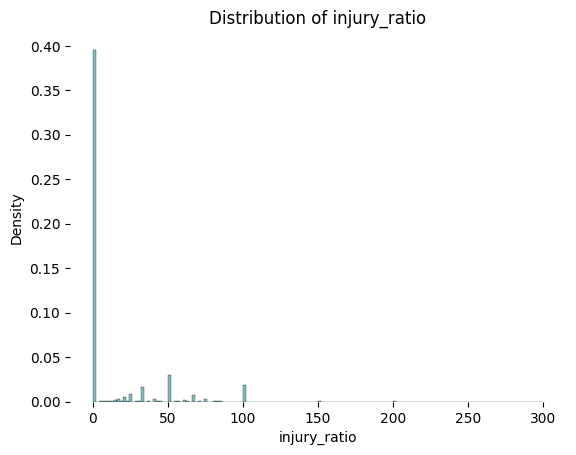

In [16]:
import seaborn as sns

sns.histplot(merged_df['injury_ratio'], stat = "density", color= "teal", alpha=0.5, bins=150).set(title= "Distribution of injury_ratio")
sns.despine(bottom = True, left = True);

In [17]:
merged_df[merged_df['injuries_total'] == 0].shape

(1991503, 36)

From the descriptive statistics and the histogram above, we see that more than half of the rows have 0 as the `injury_ratio` value. This would be because many of the car crashes recorded are minor and hence did not cause injuries in anyone. In fact, in 1,991,503 of the rows, the `injuries_total` value was 0, meaning that many crashes did not result in any injuries. 

Meanwhile, we identified that there are some `injury_ratio` values that were above 100%. 

In [18]:
merged_df[merged_df['injury_ratio'] > 100].shape

(2690, 36)

There are 2,690 rows in which the `injury_ratio` value is above 100, signifying parodoxically that there were more people who were injured from a crash than the total number of people involved in the crash. This may be due to errors or because some people with multiple injuries were recorded multiple times. As the number of such rows are small, we decided to exclude them from the dataset. 

In [19]:
merged_df = merged_df[merged_df['injury_ratio'] <= 100]
merged_df['injury_ratio'].describe()

count    2.514388e+06
mean     1.093809e+01
std      2.458892e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: injury_ratio, dtype: float64

Now, we can see that the maximum value for `injury_ratio` is 100. Below is a histogram of the distribution of `injury_ratio` values. 

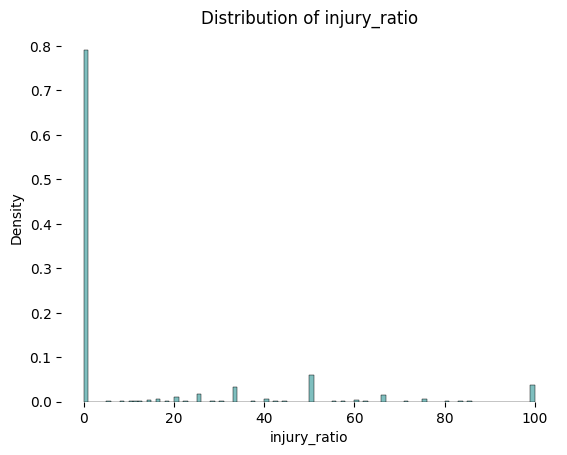

In [20]:
sns.histplot(merged_df['injury_ratio'], stat = "density", color= "teal", alpha=0.5, bins=100).set(title= "Distribution of injury_ratio")
sns.despine(bottom = True, left = True);

In [21]:
# We verify here that there are no rows where `injury_ratio` is 0
merged_df[merged_df['injury_ratio'].isna() == True].shape

(0, 36)

Moreover, the focus of our project is to examine the impact of the gender of drivers on `injury_ratio`. Hence, we will only examine the rows representing drivers involved in a car crash.

In [22]:
# remove all duplicates and rows where person is not driver
merged_df = merged_df[merged_df['person_type'] == 'DRIVER']
print(merged_df.duplicated().sum()) # we see here that there are no duplicates

0


In [23]:
# Save the DataFrame as a CSV file
merged_df.to_csv(input_path + "final_merged.csv", index=False)

In [ ]:
# This is the final dataset that we will be working on. 

merged_df = pd.read_csv(input_path + "final_merged.csv")
merged_df.head()

# Independent Variable

The independent variable that we will focus on is the sex of the driver in the crash. We will examine this variable here. 

In [24]:
merged_df['sex'].value_counts()

M    1072880
F     725883
X       1912
Name: sex, dtype: int64

We will code the `sex` variable as a dummy variable, where 1 indicates female and 0 indicates male or other. 

In [25]:
merged_df['sex_coded'] = np.where(merged_df['sex'] == "F", 1, 0)
merged_df.head()

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,model,vehicle_year,vehicle_type,unit_type,exceed_speed_limit_i,vehicle_defect,make_model,total_ppl,injury_ratio,sex_coded
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,CRUZE,1970-01-01 00:00:00.000002017,PASSENGER,DRIVER,NaN,NONE,CHEVROLET CRUZE,3,33.333333,1
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,CAMRY,1970-01-01 00:00:00.000002010,PASSENGER,DRIVER,NaN,NONE,"TOYOTA MOTOR COMPANY, LTD. CAMRY",3,33.333333,1
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,CRUZE,1970-01-01 00:00:00.000002017,PASSENGER,DRIVER,NaN,NONE,CHEVROLET CRUZE,3,33.333333,0
5,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,CAMRY,1970-01-01 00:00:00.000002010,PASSENGER,DRIVER,NaN,NONE,"TOYOTA MOTOR COMPANY, LTD. CAMRY",3,33.333333,0
6,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,2018-09-05 08:40:00,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"OVER $1,500",0.0,0.0,0.0,...,4RUNNER,1970-01-01 00:00:00.000002002,SPORT UTILITY VEHICLE (SUV),DRIVER,NaN,NONE,"TOYOTA MOTOR COMPANY, LTD. 4RUNNER",2,0.000000,1


In [26]:
sex_ratio = merged_df['sex_coded'].value_counts(normalize=True)

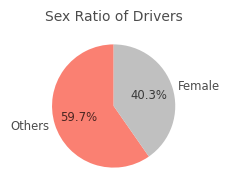

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (4, 2))

ax.pie(sex_ratio, labels = ["Others", "Female"], colors =["salmon", "silver"], startangle=90, autopct='%1.1f%%', textprops={'fontsize': "small", 'alpha': 0.7})

plt.title("Sex Ratio of Drivers", alpha=0.7, fontsize="medium");

Now, we will conduct a two sample t-test to see if the difference in mean `injury_ratio` between the two groups is significant. First, we will examine the mean difference. 

In [28]:
import scipy.stats as stats

In [29]:
merged_df.groupby("sex_coded")['injury_ratio'].mean()

sex_coded
0    8.928385
1    9.350893
Name: injury_ratio, dtype: float64

Here, we see that 1, which represents female drivers, have a higher mean compared to the other group. We will conduct a t-test to see if this difference in mean is significant. Here, the null hypothesis is that the difference in mean `injury_ratio` between the two groups is 0 and the alternative hypothesis is that there is a difference in mean `injury_ratio` between the two groups.

In [30]:
alpha = 0.1   # define alpha

# two sample ttest
teststat, pvalue = stats.ttest_ind(merged_df[merged_df['sex_coded'] == 0]['injury_ratio'].dropna(), merged_df[merged_df['sex_coded'] == 1]['injury_ratio'].dropna())
print("T statistic:", teststat, "p-value:", pvalue, end="\n")

# check whether the p-value is significant
if pvalue < alpha:
  print("We reject the null hypothesis")

else:
  print("We fail to reject the null hypothesis")

T statistic: -12.194224021177627 p-value: 3.34706898828716e-34
We reject the null hypothesis


From the above t-test, our p-value is statistically significant at 10% significance level and we have enough evidence to reject the null hypothesis. 

This shows that the difference in mean of `injury_ratio` between the two groups is significant. However, at this stage, we cannot entirely attribute the difference to driver's sex, as there may be confounding variables. Hence, in the next sections, we examine various variables that may need to be controlled for in order to examine the influence of driver's sex on `injury_ratio`. 


# Control Variables

## External Factors

### Geographical Overview of Crashes in Chicago

First, we mapped all the crashes onto the map of Chicago to see whether there are any significant clusters in certain neighborhoods.

In [ ]:
# Install necessary libraries
!pip install descartes
!pip install geopandas

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium

%matplotlib inline
# Source: 'Mariana, A. (2021, April 15). Geopandas 101: Plot any data with a latitude and longitude on a map.
# Towards Data Science. https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972'

In [32]:
path = '/content/drive/MyDrive/EY 2022-2023 Junior/Spring 2023/SOCSC-UH 2214 Applied Data Science/project/' #Ashley

In [ ]:
# Clean the latitude and longitude
merged_df.dropna(subset=['longitude', 'latitude'], inplace=True)
merged_df = merged_df[(merged_df['longitude'] != 0) & (merged_df['latitude'] != 0)]
# Import the shapefile of Chicago map
chicago_map = gpd.read_file(path+'m2/chicago.shx')
# Prepare the data
geometry1 = [Point(xy) for xy in zip(merged_df['longitude'], merged_df['latitude'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(merged_df,
                          crs = crs,
                          geometry = geometry1)

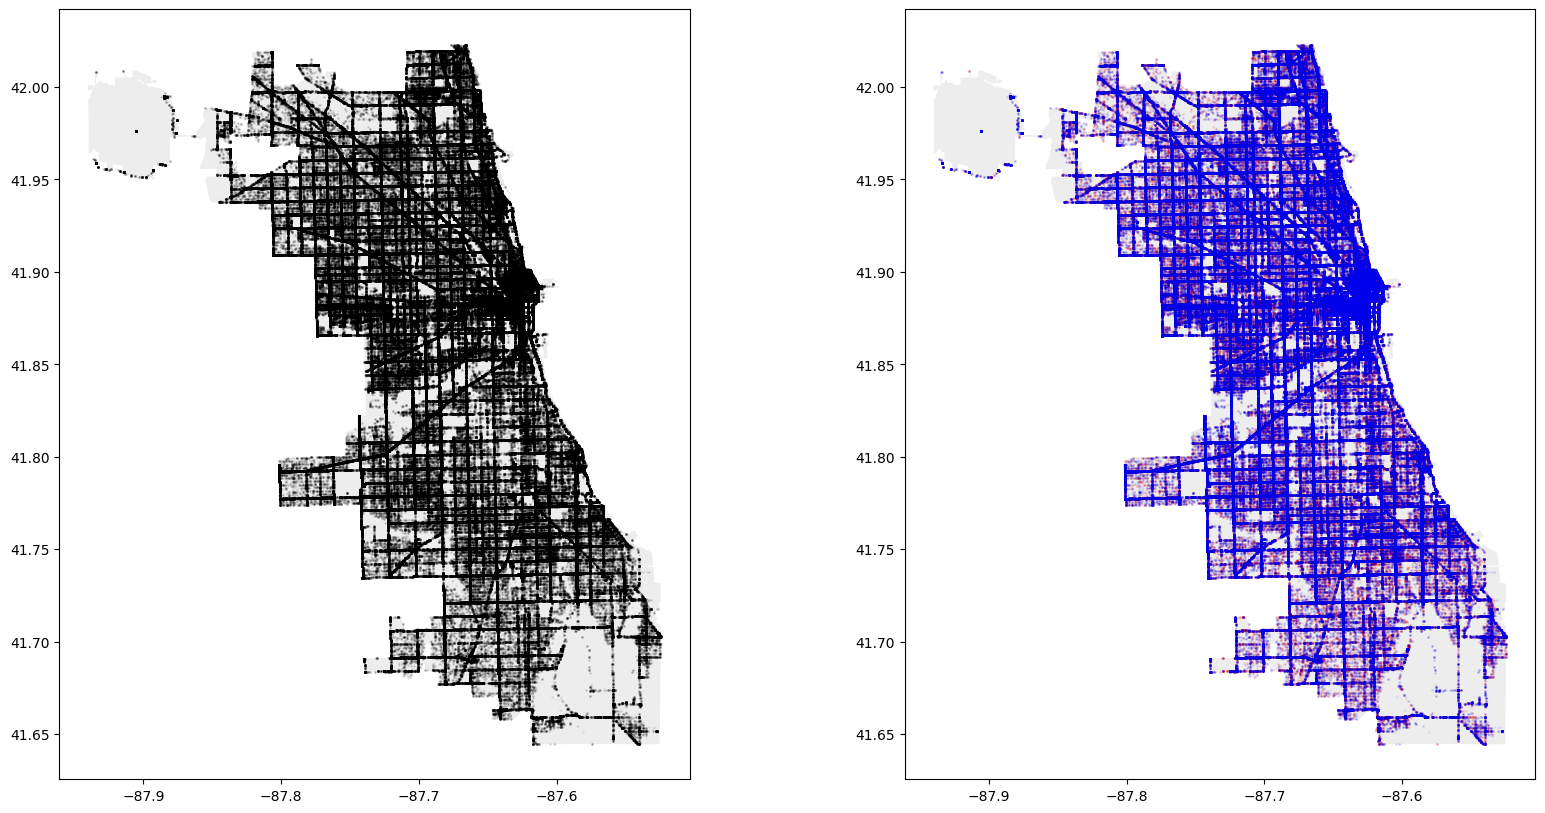

In [37]:
# Plot with color-coded points based on sex_coded variable
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

chicago_map.plot(ax=axs[0], alpha=0.4, color='lightgrey')
geo_df.plot(ax=axs[0], markersize=1, color='black', marker='o', alpha=0.05)

chicago_map.plot(ax=axs[1], alpha=0.4, color='lightgrey')
geo_df[geo_df['sex_coded']==1].plot(ax=axs[1], markersize=1, color='red', marker='o', alpha=0.05)
geo_df[geo_df['sex_coded']==0].plot(ax=axs[1], markersize=1, color='blue', marker='o', alpha=0.05)

plt.show()

In [41]:
df_sample = merged_df.sample(n=2000, random_state=42)

m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
for index, row in df_sample.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        color = 'blue', radius = 0.1, opacity = 0.1
    ).add_to(m)
m

### Traffic Devices

We continue by examining traffic device conditions (e.g. traffic signs).

In [42]:
print(merged_df['device_condition'].value_counts())
merged_df = merged_df[(merged_df["device_condition"].isna()== False)]

NO CONTROLS                 887361
FUNCTIONING PROPERLY        770158
OTHER                        14414
FUNCTIONING IMPROPERLY       10902
NOT FUNCTIONING               6002
WORN REFLECTIVE MATERIAL       771
MISSING                        243
Name: device_condition, dtype: int64


Based on how traffic devices work, we can suppose that if there were either no controls (meaning, it's a standard stretch of road) or they were functioning properly, the accident was most likely not influenced by the traffic device. On the other hand, there may be some correlation if the traffic device was not working properly. We do a numerical encoding (since this is a categorical variable).

In [43]:
#assign a 0 value if the traffic device does not have a chance of influencing injury ratio, 1 otherwise
merged_df['device_coded'] = np.where(merged_df['device_condition']=='NO CONTROLS', 0,1)
merged_df['device_coded'] = np.where(merged_df['device_condition']=='FUNCTIONING PROPERLY', 0,merged_df['device_coded'])
merged_df['device_coded'] = np.where(merged_df['device_condition']=='FUNCTIONING IMPROPERLY', 1,merged_df['device_coded'])
merged_df['device_coded'] = np.where(merged_df['device_condition']=='OTHER', 1,merged_df['device_coded'])
merged_df['device_coded'] = np.where(merged_df['device_condition']=='NOT FUNCTIONING', 1,merged_df['device_coded'])
merged_df['device_coded'] = np.where(merged_df['device_condition']=='WORN REFLECTIVE MATERIAL', 1,merged_df['device_coded'])
merged_df['device_coded'] = np.where(merged_df['device_condition']=='MISSING', 1,merged_df['device_coded'])

In [44]:
merged_df.sample(5)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,vehicle_type,unit_type,exceed_speed_limit_i,vehicle_defect,make_model,total_ppl,injury_ratio,sex_coded,geometry,device_coded
1007026,4dcf896d8d89e26c6b33958a993a5e622547f5da3a8bbe...,2017-03-16 21:37:00,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,"OVER $1,500",0.0,0.0,0.0,...,PASSENGER,DRIVERLESS,NaN,NONE,CHEVROLET CAMARO,1,0.0,0,POINT (-87.68991 41.99418),0
741265,306f6bf74176e79caa2c7eddbc368bbd455c6eea79cfc2...,2017-09-26 15:15:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,1.0,...,PASSENGER,DRIVER,NaN,NONE,HONDA ACCORD,4,25.0,0,POINT (-87.68259 41.99074),0
356885,08eb65480624c48abf2cd3bf8c2f6d398fe8662f901984...,2017-08-26 23:14:00,NO CONTROLS,CLEAR,DARKNESS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",3.0,0.0,3.0,...,PASSENGER,DRIVER,NaN,NONE,LEXUS GS350,6,50.0,1,POINT (-87.61599 41.68529),0
1661943,b39a33cde7da8a372835802b21474c29043a65cf863db7...,2020-10-23 12:45:00,NO CONTROLS,RAIN,DAYLIGHT,NO INJURY / DRIVE AWAY,$500 OR LESS,0.0,0.0,0.0,...,PASSENGER,DRIVER,NaN,NONE,CHEVROLET COBALT,2,0.0,0,POINT (-87.82151 41.99317),0
623816,256765a453c700797938b1a94bfdb28b07a75e5e280621...,2020-11-03 16:10:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",3.0,0.0,0.0,...,PASSENGER,DRIVER,NaN,NONE,KIA SORENTO,5,60.0,0,POINT (-87.61673 41.80929),0


We can visualize our encoding result too:

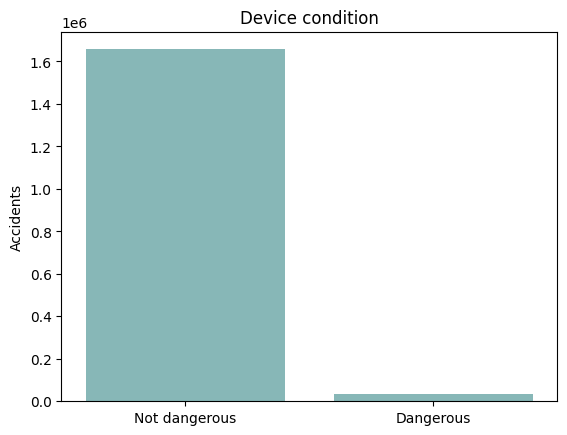

In [45]:
import seaborn as sns

sns.countplot(x=merged_df['device_coded'], color= "teal", alpha=0.5);
plt.title('Device condition');
plt.xticks([0,1],['Not dangerous','Dangerous']);
plt.ylabel('Accidents')
plt.xlabel('');

We can now run correlation to check for statistical significance. This should be Spearman correlation since we're only interested in evaluating whether there is a monotonic relationship between injury ratio and traffic devices or not.

In [46]:
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['device_coded'])

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is 0.01132291142366275
P-value is 4.825281923118886e-49
The result is statistically significant


We got a 0.01 coefficient, which suggests weak correlation given that our p-value is extremely small and that we have roughly a million samples. As such, we should keep device condition as a control variable.

### Weather Conditions

We now examine weather conditions in a similar fashion.

In [47]:
print(merged_df['weather_condition'].value_counts())
merged_df = merged_df[(merged_df["weather_condition"].isna()== False)]

CLEAR                       1369020
RAIN                         161575
SNOW                          61837
CLOUDY/OVERCAST               56407
OTHER                          5299
FREEZING RAIN/DRIZZLE          3354
FOG/SMOKE/HAZE                 2521
SLEET/HAIL                     2452
BLOWING SNOW                    886
SEVERE CROSS WIND GATE          288
BLOWING SAND, SOIL, DIRT          8
Name: weather_condition, dtype: int64


As we can see, all the weather conditions that aren't clear make up for difficult driving conditions, so we can roughly categorize this as a binary variable (just for the purposes of checking statistical significance).

In [48]:
#assign a 0 value if the weather does not have a chance of influencing injury ratio, 1 otherwise
merged_df['weather_coded'] = np.where(merged_df['weather_condition']!='CLEAR', 1,0)

In [49]:
merged_df.sample(5)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,unit_type,exceed_speed_limit_i,vehicle_defect,make_model,total_ppl,injury_ratio,sex_coded,geometry,device_coded,weather_coded
1455315,9b4a236539140405a56b133cd36544bc8921e3fb240932...,2019-10-10 12:30:00,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"OVER $1,500",0.0,0.0,0.0,...,DRIVER,NaN,UNKNOWN,NaN,1,0.000000,0,POINT (-87.58506 41.73627),0,0
1252150,687c7696449b38665f4231cb315df5cad115a42d507295...,2022-01-26 08:45:00,NO CONTROLS,SNOW,DAYLIGHT,NO INJURY / DRIVE AWAY,$500 OR LESS,0.0,0.0,0.0,...,DRIVER,NaN,FUEL SYSTEM,FORD EXPLORER,2,0.000000,1,POINT (-87.74233 41.77566),0,1
186253,8969ec582c0490ba2ec8471667d22939bd002bdaaf83d0...,2019-02-08 18:20:00,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,DRIVER,NaN,NONE,MERCURY MARINER,3,33.333333,1,POINT (-87.61543 41.76664),0,0
397195,0abbf8f8c5bfd30c1762c82779e920a96a39630583730c...,2020-10-19 11:45:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"$501 - $1,500",0.0,0.0,0.0,...,DRIVER,NaN,NONE,NaN,3,0.000000,0,POINT (-87.74824 41.80929),0,0
1163384,60db94c7c6e488212b7e43cb5f11b19b6cf95ef637e20b...,2020-11-25 17:18:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"$501 - $1,500",0.0,0.0,0.0,...,DRIVER,NaN,UNKNOWN,BUICK ENCORE,5,0.000000,0,POINT (-87.67377 41.76839),0,0


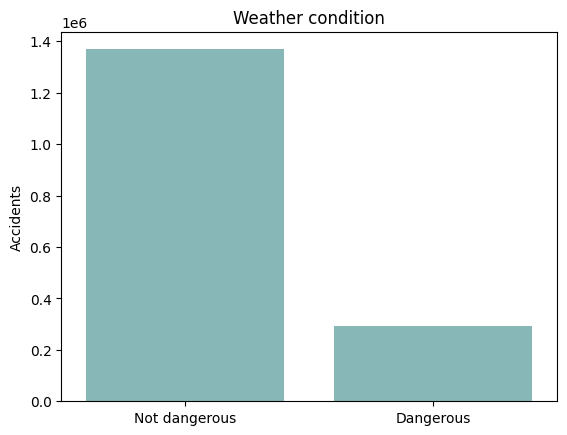

In [50]:
import seaborn as sns

sns.countplot(x=merged_df['weather_coded'], color= "teal", alpha=0.5);
plt.title('Weather condition');
plt.xticks([0,1],['Not dangerous','Dangerous']);
plt.ylabel('Accidents')
plt.xlabel('');

Again, we run a correlation. This should be Spearman correlation since we're only interested in evaluating whether there is a monotonic relationship between injury ratio and weather conditions or not.

In [51]:
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['weather_coded'])

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is 0.012062102157613533
P-value is 1.3922151222671488e-54
The result is statistically significant


We got a 0.01 coefficient, which suggests weak correlation given that our p-value is extremely small and that we have roughly a million samples. As such, we should keep weather conditions as a control variable.

### Lighting Conditions

Finally, we examine the lighting conditions in a similar fashion.

In [52]:
print(merged_df['lighting_condition'].value_counts())
merged_df = merged_df[(merged_df["lighting_condition"].isna()== False)]

DAYLIGHT                  1162831
DARKNESS, LIGHTED ROAD     352280
DARKNESS                    65754
DUSK                        51269
DAWN                        27363
Name: lighting_condition, dtype: int64


As we can see, all the lighting conditions that aren't daylight make up for difficult driving conditions, so we can roughly categorize this as a binary variable (just for the purposes of checking statistical significance).

In [53]:
#assign a 0 value if the lighting does not have a chance of influencing injury ratio, 1 otherwise
merged_df['lighting_coded'] = np.where(merged_df['lighting_condition']!='DAYLIGHT', 1,0)

In [54]:
merged_df.sample(5)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,exceed_speed_limit_i,vehicle_defect,make_model,total_ppl,injury_ratio,sex_coded,geometry,device_coded,weather_coded,lighting_coded
2195470,f1792c899832ff5c9ae640f7ee9adef8808339b015b217...,2016-11-17 14:30:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"OVER $1,500",0.0,0.0,0.0,...,NaN,NONE,MITSUBISHI LANCER,2,0.000000,1,POINT (-87.67789 41.91764),0,0,0
1450054,9bd6f4fcc81641127ad60010c776bea42d371c6a1916f7...,2019-10-27 08:30:00,WORN REFLECTIVE MATERIAL,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"$501 - $1,500",0.0,0.0,0.0,...,NaN,NONE,MERCURY MILAN,2,0.000000,0,POINT (-87.61587 41.85806),1,0,0
703793,2c9980aad665cf5ca1bc22568b792619f934b823f833ab...,2016-09-09 07:20:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"$501 - $1,500",0.0,0.0,0.0,...,NaN,NONE,HONDA ACCORD,1,0.000000,1,POINT (-87.73542 41.87397),0,0,0
77494,7ebd574740bc2343a3cac17f0ef18edd6faebed95bc06a...,2020-12-10 16:00:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",2.0,0.0,0.0,...,NaN,NONE,KIA OPTIMA / K5,3,66.666667,0,POINT (-87.58528 41.72243),0,0,0
396419,0ad91249b7fb60c339ac1e4ec3253f69659c57d294b988...,2017-04-24 08:30:00,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"$501 - $1,500",0.0,0.0,0.0,...,NaN,NONE,LEXUS RX330,2,0.000000,1,POINT (-87.78759 41.99746),0,0,0


We can visualize our encoding result too:

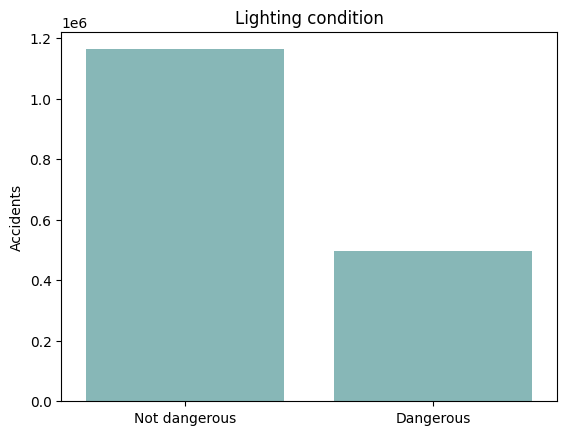

In [55]:
import seaborn as sns

sns.countplot(x=merged_df['lighting_coded'], color= "teal", alpha=0.5);
plt.title('Lighting condition');
plt.xticks([0,1],['Not dangerous','Dangerous']);
plt.ylabel('Accidents')
plt.xlabel('');

Again, we run a correlation. This should be Spearman correlation since we're only interested in evaluating whether there is a monotonic relationship between injury ratio and lighting conditions or not.

In [56]:
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['lighting_coded'])

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is 0.05427225121106353
P-value is 0.0
The result is statistically significant


We got a 0.05 coefficient, which suggests weak correlation given that our p-value is extremely small and that we have roughly a million samples. As such, we should keep lighting condition as a control variable.

## Vehicle-related Factors
To expand the analysis on the gender of the driver, it is necessary to deep dive into vehicles-related variables. By studying vehicles and their performance in crashes, we can gain a deeper understanding of the factors associated with higher injury rates which could possibly account for gender differences as well and need to be controlled for. 

To do this analysis, we will use the our merged dataset and particularly, variables which initially come from the vehicles dataset. The variables are 'vehicle_id', 'crash_record_id', 'make', 'model', 'vehicle_year', 'vehicle_type', 'unit_type', 'exceed_speed_limit_i', 'vehicle_defect', 'crash date'.

There is ample literature to suggest that vehicle model, year, and potential defects, as well as driver behavior such as exceeding speed limits, can significantly impact injury rates in the event of a crash. The design, construction, and safety features of a vehicle can all play a role in the degree of injury sustained in a collision. Newer models tend to incorporate more advanced safety features, such as airbags, seat belts, and electronic stability control systems, which can provide greater protection for occupants. Additionally, vehicles with defects or mechanical issues may be more prone to accidents, or may fail to protect occupants in the event of a collision. Speeding, on the other hand, increases the likelihood of an accident and can lead to more severe injuries, as the force of the impact is greater at higher speeds. Here is an example of related literature:

- A study published in the Journal of Safety Research found that newer vehicles tend to have lower fatality rates in crashes than older vehicles, likely due to improvements in vehicle safety features over time (Eichelberger, McCartt, & Teoh, 2015).
- Another study published in Accident Analysis and Prevention found that vehicles with defects were more likely to be involved in accidents, and that defects related to brakes, steering, and tires were particularly dangerous (Cavallo, Tridello, & Simone, 2019).
- Research has also shown that speeding is a major contributor to the severity of injuries in crashes. A study published in the Journal of Safety Research found that speeding was associated with a greater likelihood of severe injury or death in crashes (Foss, Goodwin, & McCartt, 2013).

These studies, and others like them, provide evidence to suggest that vehicle model, year, defects, and driver behavior can all have a significant impact on injury rates in crashes and therefore, would be accounted for in our analysis.



For further convenience, I will use variables initially coming from vehicles dataset in this part of the analysis. To do so, I select certain columns in the merged dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
merged_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/final_merged_alex.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-64-d903342e3a90>:4: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/final_merged_alex.csv")


Vehicle_id plays an important role in the dataset as it identifies each unique vehicle. We see that vehicle_id is missing for some of the entries where unit_type is not a driver. For the purpose of this analysis and the hypothesis we have, it is crucial to focus on the driver-units. Before dropping the values, I make sure that the absolute majority of the entries are driver-units. 

In [ ]:
# extract the count of the value 'driver'
not_driver_count = value_counts.get('DRIVER', 0)
# calculate the count of entries in the 'unit_type' column that are not 'driver'
not_driver_entries_count = len(merged_df) - not_driver_count #6% of the total entries
merged_df=merged_df[merged_df['unit_type'] == 'DRIVER']
merged_df.shape

### Vehicle type Analysis
Vehicle type is an important factor that can affect the injury rate of accidents. The type of vehicle involved in an accident can have a significant impact on the severity of injuries sustained by occupants, as well as on the likelihood of injury in the first place.


From the plot we can see that some of the vehicle types have higher medians such as different types motorcycles, ATVs and ROVs. To add the extra robustness to the analysis, it might be important to include vehicle type as a fixed effect variable to the regression.

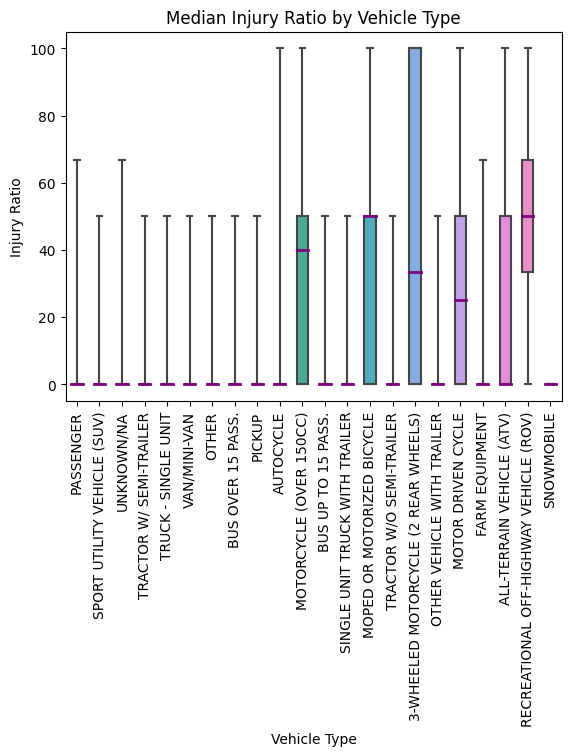

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by vehicle type and calculate the median injury ratio for each group
medians = merged_df.groupby('vehicle_type')['injury_ratio'].median()

# create a box plot with medians and whiskers
boxplot = sns.boxplot(x='vehicle_type', y='injury_ratio', data=merged_df, showfliers=False, 
                      medianprops={'linewidth': 2, 'color': 'purple'}, 
                      width=0.5, whis=[5, 95])

# set the plot title and axes labels
boxplot.set_title("Median Injury Ratio by Vehicle Type")
boxplot.set_xlabel("Vehicle Type")
boxplot.set_ylabel("Injury Ratio")

# rotate the x-axis labels for better readability
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)

# show the plot
plt.show()


### Make and Model Analysis
The make and model of a vehicle can play a significant role in the injury ratio of accidents. This is because different vehicle makes and models have varying safety features and structural designs that can affect the severity of an accident

Let's investigate if there are particularly dangerous manufacturers which have higher injury ratios.

In [59]:
import pandas as pd

# Group the dataframe by manufacturer and calculate summary statistics
summary_df = merged_df.groupby('make')['injury_ratio'].agg({'median', 'mean'}).reset_index()

# Rename the columns
summary_df.columns = ['manufacturer', 'median_injury_ratio', 'mean_injury_ratio']

# Print the resulting summary dataframe
summary_df["mean_injury_ratio"].value_counts()

0.000000      1003
50.000000       54
33.333333       26
100.000000      25
25.000000       16
66.666667        9
16.666667        7
37.500000        2
20.000000        2
75.000000        2
60.000000        2
12.500000        2
28.571429        1
57.142857        1
40.000000        1
13.333333        1
29.166667        1
22.222222        1
Name: mean_injury_ratio, dtype: int64

Interestingly, we see that 16 manufacturers have median injury_rate as 100%. Let's see who are they.

In [60]:
grouped_data = merged_df.groupby('make')['injury_ratio'].median()
filtered_data = grouped_data[grouped_data == 100]
filtered_data

make
"IMPERIAL -- CODES BELOW ARE ONLY FOR 1980 AND EARLIER MODEL    100.0
AIRCRAFT - HELICOPTER                                           100.0
AMERICAN CLIPPER CORP., MORGAN HILL, CALIFORNIA                 100.0
AMERICAN ROAD EQUIPMENT (OMAHA, NB)                             100.0
BABETTA (MFD. BY JAWA, IMPORTED BY AMERICAN JAWA)               100.0
CHICAGO PNEUMATIC EQUIPMENT DIVISION                            100.0
CONWAY                                                          100.0
DITCH WITCH                                                     100.0
F. & H. MFG. CO.                                                100.0
FOST JOE DOG                                                    100.0
FROST TRAILER CO.                                               100.0
GARELLI                                                         100.0
GSM                                                             100.0
HYSTER CORP.                                                    100.0
KING-CO        

While it might be interesting to see the most dangerous models, the results for median and mean injury rates might be skewed due to the low representation of a particular make and model in the sample. We decided that it would be more valuable to see if there is a relation between socio-economic status of a driver with injury rate. 


As a proxy of a socio-economic status, we want to use a cost of their vehicles. To do so, we use an additional Car Prices dataset (https://www.kaggle.com/datasets/sidharth178/car-prices-dataset). 

In [ ]:
car_prices = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train.csv")
#To make comparisons we transform the data
car_prices["make_model"] = car_prices["Manufacturer"] +"_"+ car_prices["Model"] 
car_prices.value_counts()
median_prices = car_prices.groupby("make_model")["Price"].median()
references = pd.DataFrame(columns=["make_model", "median_price"])
references["make_model"] = median_prices.index
references["median_price"] = median_prices.values
references
references["make_model"] = references["make_model"].str.upper()
#Now we transform our original dataset and merge them 
merged_df['make_model'] = merged_df['make'] + '_'+merged_df['model']
merged_df= pd.merge(merged_df, references, on='make_model', how='left')

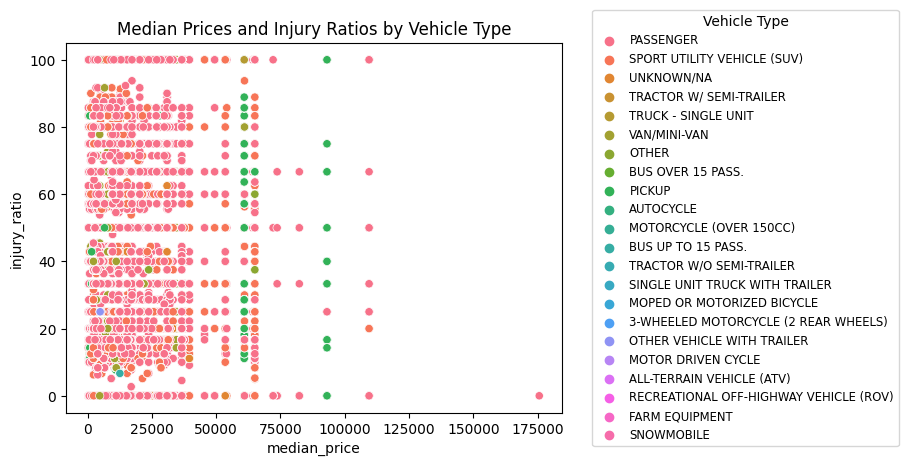

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="median_price", y="injury_ratio", data=merged_df, hue="vehicle_type")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, title='Vehicle Type', fontsize='small')
plt.title("Median Prices and Injury Ratios by Vehicle Type")
plt.show()

Based on the graph, vehicle age does not have association with injury rate. Let's check it through correlation analysis and t-test.

In [ ]:
from scipy import stats

corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['median_price'], nan_policy='omit')

alpha = 0.1

if pvalue < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is {}".format(result))


Correlation coefficient is -0.0015364741763666879
P-value is 0.1899049164373388
The result is not statistically significant


Based on that price of the vehicle would not be used as control variable in the regression.


To make more sense of the price of vehicle let's group them.

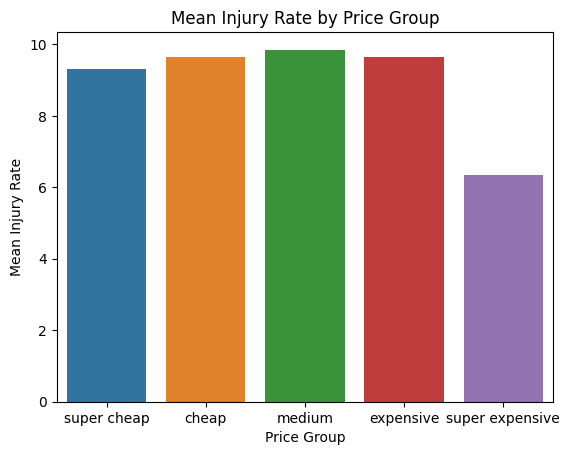

In [ ]:
labels = ["super cheap","cheap","medium", "expensive", "super expensive"]
# See https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#tiling
merged_df['price_group'] = pd.cut(merged_df.median_price, range(0, 94000, 18799), right=False, labels=labels)  
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by price group and calculate the mean injury rate
grouped = merged_df.groupby('price_group')['injury_ratio'].mean().reset_index()

# Create the bar plot
sns.barplot(x='price_group', y='injury_ratio', data=grouped)

# Set the title and axis labels
plt.title('Mean Injury Rate by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Mean Injury Rate')

# Show the plot
plt.show()

While it may seem that super expensive cars are associated with lower injury rates, it might be just representation bias. Based on the correlation analysis, the price would not be included in the regression.

### Vehicle Age Analysis
By calculating the age of the vehicle at the time of the accident, it is possible to gain insights into the potential impact of vehicle age on the likelihood of injuries in the event of an accident. 

In [62]:
import numpy as np
#changing the original dataframe
merged_df["vehicle_year"] = merged_df["vehicle_year"].astype(str)
merged_df["vehicle_year_value"] = merged_df["vehicle_year"].str[25:29]
#replace empty or non-numeric values with NaN
merged_df["vehicle_year_value"] = merged_df["vehicle_year_value"].replace('', np.nan)
#convert column to float and then to integer data type
merged_df["vehicle_year_value"] = merged_df["vehicle_year_value"].astype(float).astype('Int64')
merged_df.loc[merged_df["vehicle_year_value"] > 2023, "vehicle_year_value"] = np.nan
merged_df["crash_date"] = pd.to_datetime(merged_df["crash_date"], format="%Y-%m-%d %H:%M:%S")
merged_df["crash_year"]=merged_df["crash_date"].dt.year
merged_df["vehicle_age"]=merged_df["crash_year"]-merged_df["vehicle_year_value"]


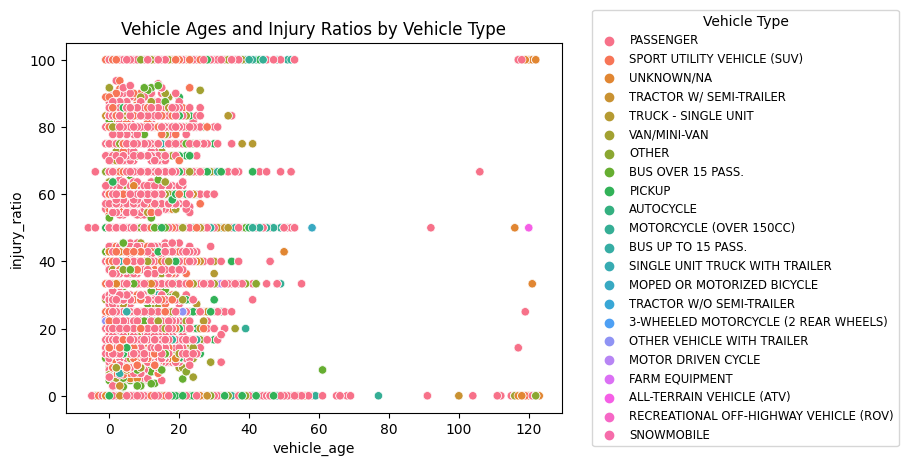

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="vehicle_age", y="injury_ratio", data=merged_df, hue="vehicle_type")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, title='Vehicle Type', fontsize='small')
plt.title("Vehicle Ages and Injury Ratios by Vehicle Type")
plt.show()

In [64]:
from scipy import stats
merged_df["vehicle_age"] = merged_df["vehicle_age"].astype('float64')
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['vehicle_age'], nan_policy='omit')

alpha = 0.1

if pvalue < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is {}".format(result))

Correlation coefficient is 0.039711211860798096
P-value is 0.0
The result is statistically significant


While the correlation coefficient is small, we will include it in the regression as control as it is statistically significant.

### Vehicle Defect Analysis
Vehicle defects can have a significant impact on injury rates in the event of a crash. Defects such as faulty brakes, steering problems, and malfunctioning airbags can increase the severity of injuries sustained in a crash

In [65]:
merged_df["vehicle_defect"].value_counts()

NONE                1052690
UNKNOWN              570965
BRAKES                 7115
OTHER                  6345
TIRES                   819
STEERING                717
WHEELS                  417
SUSPENSION              270
ENGINE/MOTOR            243
FUEL SYSTEM             136
LIGHTS                  100
WINDOWS                  89
SIGNALS                  53
CARGO                    50
RESTRAINT SYSTEM         27
EXHAUST                  25
TRAILER COUPLING         23
Name: vehicle_defect, dtype: int64

As we can see, all the weather conditions that aren't clear make up for difficult driving conditions, so we can roughly categorize this as a binary variable (just for the purposes of checking statistical significance).

In [79]:
#assign a 0 value if the vehicle defect does not have a chance of influencing injury ratio, 1 otherwise
merged_df['vehicle_defect_coded'] = np.where(merged_df['vehicle_defect']!='NONE', 1,0)

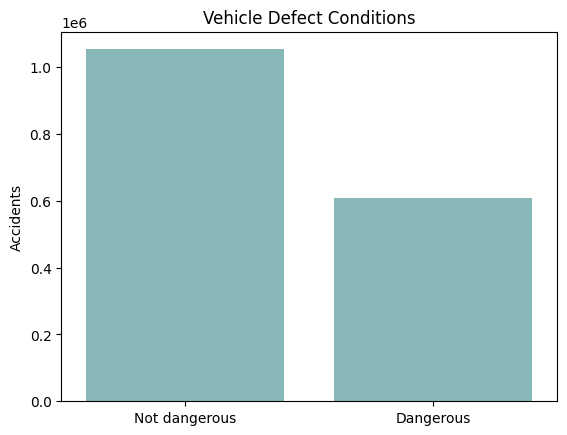

In [67]:
import seaborn as sns

sns.countplot(x=merged_df['vehicle_defect_coded'], color= "teal", alpha=0.5);
plt.title('Vehicle Defect Conditions');
plt.xticks([0,1],['Not dangerous','Dangerous']);
plt.ylabel('Accidents')
plt.xlabel('');

We run a correlation. This should be Spearman correlation since we're only interested in evaluating whether there is a monotonic relationship between injury ratio and vehicle defects or not.

In [80]:
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['vehicle_defect_coded'])

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is 0.07035414837722126
P-value is 0.0
The result is statistically significant


Based on the regression results, we need to include vehicle defect coded as a control variable

### Speed Limit Analysis
The speed limit is an important factor that can affect the injury rate in car crashes. Driving at high speeds increases the likelihood of accidents and the severity of injuries sustained by passengers. 

In [81]:
merged_df["exceed_speed_limit_i"].value_counts()

Y    1890
N     725
Name: exceed_speed_limit_i, dtype: int64

In [82]:
#assign a 1 value if there was speed limit exceeded
merged_df['speed_limit_coded'] = np.where(merged_df['exceed_speed_limit_i'] == 'Y', 1,
                                          np.where(merged_df['exceed_speed_limit_i'] == 'N', 0, np.nan))


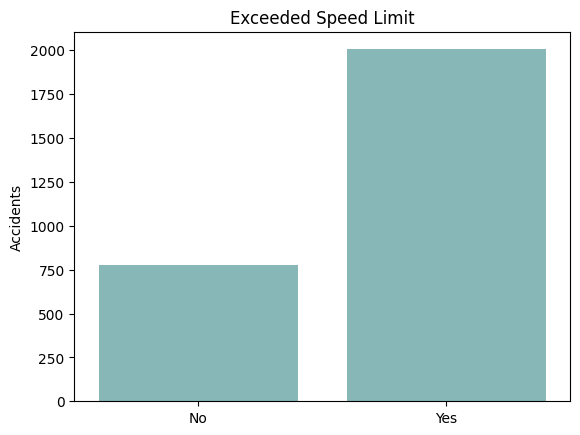

In [ ]:
import seaborn as sns

sns.countplot(x=merged_df['speed_limit_coded'], color= "teal", alpha=0.5);
plt.title('Exceeded Speed Limit');
plt.xticks([0,1],['No','Yes']);
plt.ylabel('Accidents')
plt.xlabel('');

In [ ]:
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['speed_limit_coded'], nan_policy='omit')

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is 0.08079694647899059
P-value is 1.9705259158662444e-05
The result is statistically significant


## Driver-related Factors

#### Age

First, we will examine the age of the drivers in our dataset. 

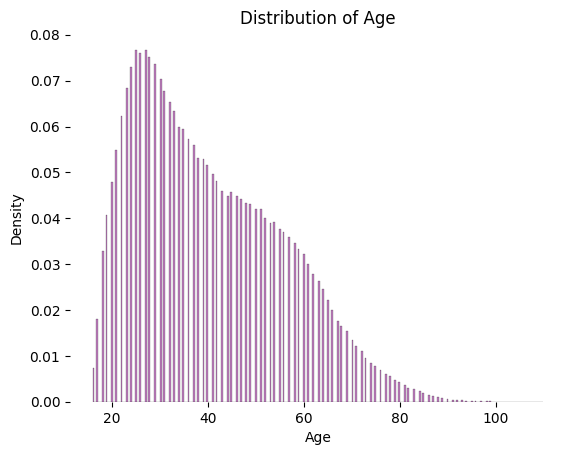

In [69]:
import seaborn as sns

sns.histplot(merged_df['age'], stat = "density", color= "purple", alpha=0.5).set(title='Distribution of Age', xlabel = "Age")
sns.despine(bottom = True, left = True);

From the distribution above, we can see that there are a lot of drivers whose ages are young, in their 10s and 20s. We will if the `age` factor influences `injury_ratio` though analyzing the correlation. From the above distribution, we checked that the distribution is skewed to the right and does not satisfy the normality assumption. Hence, I will use the Spearman's correlation, which does not assume normality.

First, we created a scatter plot to see if the correlation can be visualized quickly. However, the below scatter plot is quite messy and does not show an apparent direction of association between `age` and `injury_ratio`. 

We ran a Spearman correlation test to see if there is still a correlation between the two. 

In [70]:
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['age'])

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is -0.021993678344190255
P-value is 1.2458262904970774e-176
The result is statistically significant


Here, we see that the correlation coefficient between `age` and `injury_ratio` is -0.02. While the negative correlation is quite weak, the p-value is still significant, so we will include the `age` variable as a control variable in our model. 

This result does not seem to be dependent on a vast difference in scale between the variables, since using a logarithmic scale we'll obtain similar results:

In [71]:
merged_df['log_age'] = np.log(merged_df['age'])
merged_df[['age', 'log_age']].head()

,age,log_age
2,22.0,3.091042
3,22.0,3.091042
4,56.0,4.025352
5,56.0,4.025352
6,39.0,3.663562


In [72]:
corr, pvalue = stats.spearmanr(a=merged_df['injury_ratio'], b=merged_df['log_age'])

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is -0.021993678344190255
P-value is 1.2458262904970774e-176
The result is statistically significant


For ease of further analysis, we will divide the people involved in the car crashes into various age groups. 

In [73]:
def quantize(value):
  if value < 20:
    level = '10s'
  
  elif (value >= 20) and (value < 30 ):
    level = '20s'

  elif (value >= 30) and (value < 40 ):
    level = '30s'

  elif (value >= 40) and (value < 50 ):
    level = '40s'

  elif (value >= 50) and (value < 60 ):
    level = '50s'

  elif (value >= 70):
    level = '60s and above'

  else: 
    level = None

  return level

In [74]:
merged_df['age_group'] = merged_df['age'].apply(quantize)
merged_df.head(2)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,geometry,device_coded,weather_coded,lighting_coded,vehicle_year_value,crash_year,vehicle_age,vehicle_defect_coded,log_age,age_group
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,POINT (-87.64120 41.88455),0,0,0,2017,2019,2.0,0,3.091042,20s
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,POINT (-87.64120 41.88455),0,0,0,2010,2019,9.0,0,3.091042,20s


In [75]:
driver_agegroup = merged_df['age_group'].value_counts(normalize= True).sort_index()

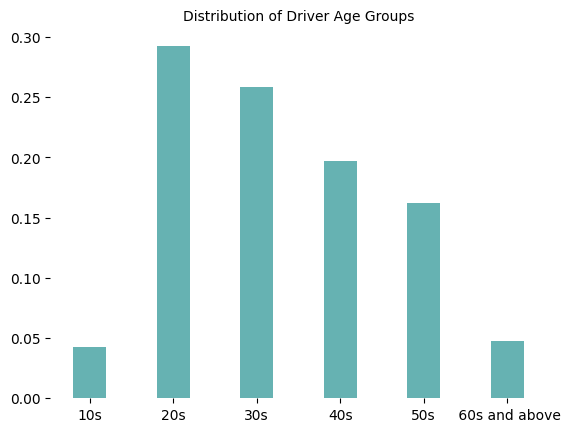

In [76]:
plt.bar(x = ['10s', '20s', '30s', '40s','50s',' 60s and above'], height = driver_agegroup, width = 0.4, color = "Teal", alpha = 0.6)
plt.title("Distribution of Driver Age Groups", fontsize="medium")

for spine in plt.gca().spines.values():
  spine.set_visible(False)
  
plt.tight_layout;

Here, we can see that there are a lot of young drivers in their 20s. To check if the correlation between age group as a categorical variable and `injury_ratio` provides a different result, we ran a Spearman's correlation without the normality assumption. 

In [77]:
# make categorical variable into numerical variable 
groups = ["10s", "20s", "30s", "40s", "50s", "60s and above"]

# Create a dictionary that maps each category to its corresponding numerical value
ranks = {"10s":0, "20s":1, "30s":2, "40s":3, "50s":4, "60s and above":5}

# Convert the categorical variable into a list of its numerical values using a list comprehension
merged_df['age_ranked'] = merged_df[merged_df['age_group'].isna() == False]['age_group'].apply(lambda x: ranks[x])

# Find Spearman's correlation
corr, pvalue = stats.spearmanr(merged_df[merged_df['age_group'].isna() == False]['injury_ratio'], merged_df[merged_df['age_group'].isna() == False]['age_ranked'])

alpha = 0.1

if pvalue < alpha: 
  result = "statistically significant"
else:
  result = "not statistically significant"

print("Correlation coefficient is {}".format(corr))
print("P-value is {}".format(pvalue))
print("The result is", result)

Correlation coefficient is -0.021370660221082898
P-value is 5.742276734079989e-152
The result is statistically significant


We can see here that the result is still statistically significant. Hence, we will include the `age` variable as control variable.

# Main Regression

Now, we will do an OLS regression with the defined independent, dependent, and control variables. We will report the coefficient and R^2 as a table. 

In [90]:
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Replace NaN values with mean value
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X4)

# Calculate VIF with imputed data
vif["VIF Factor"] = [variance_inflation_factor(X_imputed, i) for i in range(X_imputed.shape[1])]
vif["features"] = X4.columns

# Print the VIF table
print(vif)

    VIF Factor              features
0  1667.045298                 const
1     1.007502             sex_coded
2     1.000413          device_coded
3     1.005907         weather_coded
4     1.023286        lighting_coded
5     1.008103           vehicle_age
6     1.011811  vehicle_defect_coded
7     1.000017     speed_limit_coded
8     1.015427                   age


In [87]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor

### OLS 1: Without control variables ###
# Create the IV and DV
X1 = merged_df['sex_coded']
Y = merged_df['injury_ratio']
X1 = sm.add_constant(X1)
# Create the OLS model and fit it to the data
model1 = sm.OLS(Y, X1)
result1 = model1.fit()

### OLS 2: With external factors as control variables ###
# Create the X and y variables for the model with control variables
X2 = merged_df[['sex_coded', 'device_coded','weather_coded', 'lighting_coded']]
X2 = sm.add_constant(X2)
# Create the OLS model and fit it to the data
model2 = sm.OLS(Y, X2)
result2 = model2.fit()

### OLS 3: With external factors and vehicles as control variables ###
#FROM INDIRA VEHICLES VARIABLES: vehicle_age, 'vehicle_defect_coded', 'speed_limit_coded', 
X3 = merged_df[['sex_coded','device_coded','weather_coded', 'lighting_coded','vehicle_age','vehicle_defect_coded','speed_limit_coded']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y, X3, missing = 'drop')
result3 = model3.fit()

### OLS 4: With external factors, vehicles, and drivers' age as control variables ###
X4 = merged_df[['sex_coded','device_coded','weather_coded', 'lighting_coded','vehicle_age','vehicle_defect_coded','speed_limit_coded','age']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(Y, X4, missing = 'drop')
result4 = model4.fit(cov_type='HC3') # with robust SE

# Combine the summary tables for the 4 models into a single table
summary_table = summary_col([result1, result2, result3, result4], 
                            model_names=['Without control',
                                         'External factors',
                                         'External factors, Vehicles as CV',
                                         'External factors, Vehicles, Driver as CV'], 
                            float_format='%0.4f',
                            stars=True,
                            regressor_order=['const', 'x1', 'c1', 'c2', 'c3'])

# Print the combined summary table
print(summary_table)


                     Without control External factors External factors, Vehicles as CV External factors, Vehicles, Driver as CV
-------------------------------------------------------------------------------------------------------------------------------
const                9.1056***       8.0800***        20.9924***                       20.2139***                              
                     (0.0231)        (0.0272)         (2.2964)                         (3.0590)                                
age                                                                                    0.0201                                  
                                                                                       (0.0565)                                
device_coded                         1.5813***        -1.9798                          -1.9723                                 
                                     (0.1301)         (5.1137)                         (4.8122)        

# Conclusion

In this milestone, we started analyzing the cleaned dataset, focusing on how to best identify the relationship between driver's gender and the severity of a car accident, measured by the injury ratio. We identified relevant control variables that we need to take into consideration in finding the relationship. In the end, we were able to generate a regression model with no imminent problems in multicollinearity that can be further developed to find how the driver's gender is related to injuries in a car accident. 